<center> <h3> Causality Assignment
-----------
<center> Michelle Hackl
<center> CS112 Prof. Diamond

## Question 1 - Debugging

In the 3 cases below, identify the major coding error in each case and explain how to fix it, in 1-2 sentences. DO NOT actually copy/paste corrected code:

[Example 1](https://gist.github.com/diamonaj/2e5d5ba5226b7b9760f5d1bf1e7bf765)
> MatchBalance is run before Match(). Match() has to be run first to create *mout*, which should then be fed into the *match.out* parameter in MatchBalance().

[Example 2](https://gist.github.com/diamonaj/3b6bc83d040098486634184d99fc4c55)
> Match() must be run with the same parameters as GenMatch(), as "ATE" is not the default *estimand*.

[Example 3](https://gist.github.com/diamonaj/a88cb40132ed8584e5182b585e1c84c8)
> Match() is run with *M = 2*, but GenMatch() is not. Their arguments (save BalanceMatrix) have to be the same.

Questions 2-4 below require the peacekeeping data set that we worked on in class, as well as this [codebook](http://www.nyu.edu/gsas/dept/politics/faculty/cohen/codebook.pdf). The class breakout instructions (including data download code) are [here](https://gist.github.com/diamonaj/3795bfc2e6349d00aa0ccfe14102858d).



In [1]:
#----------------------------------------------------------------------------
# Importing the data and removing rows with NA values.
#----------------------------------------------------------------------------
peace_data <- read.csv("https://course-resources.minerva.kgi.edu/uploaded_files/mke/00086677-3767/peace.csv")

peace_data <- peace_data[c(-19, -47), ]

head(peace_data,3)

X,dataset,ccode,cnumb,cluster,clust2,cname,yrbeg,yrend,decade,⋯,L13,Phat13,L14,Phat14,L15,Phat15,L16,Phat16,L17,Phat17
1,8,AFG2,2,AFG,AFG,Afghanistan-Taliban,93,NA,5,⋯,-0.9587072,0.2771371,-2.874360,0.05343571,1.3276421,0.7904503,-0.6054541,0.3530969,3.596548,0.9733135
2,1,AFG1,1,AFG,AFG,Afghanistan,78,92,4,⋯,-0.9591957,0.2770393,-3.277615,0.03634718,0.9243872,0.7159352,-0.6059426,0.3529853,3.596059,0.9733008
3,9,MEX,88,MEX,MEX,Mexico,92,94,5,⋯,-0.1507243,0.4623901,1.407364,0.80334985,5.6093655,0.9963500,0.2025287,0.5504598,4.404531,0.9879257


## Question 2 - Replicate Fig.8

Replicate [Figure 8](https://gking.harvard.edu/files/counterf.pdf).

A few suggestions:

1. Read the class breakout instructions above to get the data and relevant columns.
2. If you are not clear on the model, read the relevant sections of the paper and focus on understanding Table 2;
3. To plot the figure, you should use a strategy similar to the one we used in the statistics scavenger hunt, which was also used in a previous assignment (e.g., **holding predictors at their medians and looping through values of one variable to obtain treatment effects at different levels of the variable**--you may want to review the answer key for that previous assignment. However, you don't need to simulate coefficients this time.

** The relevant section from the paper reads: **

*Finally, we illustrate the model dependence that results from the fact that none of
the data are on the common support for both the intervention and nonintervention
groups. To do this, we now compare estimates of the causal effects in the two logit
analyses in Table 2, which we showed fit the data almost identically and which differ
only by one interaction term. From these logit models, we compute the marginal
effects of UN peacekeeping operations as a function of the duration of the civil war,
holding constant all other variables at their means. Figure 8 plots these results.*

** The relevant variables included in the original model are ** *wartype*, *logcost* (not *logdead*), *wardur*, *factnum* and *factnum2*, *trnsfcap*, *develop*, *exp*, *decade*, *treaty* and *untype4*.

** The modified model additionally includes a single interaction term: ** *wardur* $\times$ *untype4*.

** As our outcome variable we use ** *pbs2s3*, suggesting democracy and peace within 2 years after end of war.

In [2]:
#----------------------------------------------------------------------------
# Original model. Coefficients match those of Table 2.
#----------------------------------------------------------------------------
original <- glm(pbs2s3 ~ wartype + logcost + wardur + factnum +
                factnum2 + trnsfcap + develop + exp + decade +
                treaty + untype4, data=peace_data, family=binomial)

original$coefficients

(Intercept)       wartype       logcost        wardur       factnum 
 8.6088619754 -1.7420043394 -0.4448499389  0.0063857322 -1.2589333323 
     factnum2      trnsfcap       develop           exp        decade 
 0.0616695924  0.0040934456  0.0007900776 -6.0161788668 -0.2987758338 
       treaty       untype4 
 2.1243681123  3.1351843070

In [3]:
#----------------------------------------------------------------------------
# Modified model, with interaction term.
#----------------------------------------------------------------------------
modified <- glm(pbs2s3 ~ wartype + logcost + wardur + factnum +
                factnum2 + trnsfcap + develop + exp + decade +
                treaty + untype4 + wardur*untype4,
                data=peace_data, family=binomial) 

modified$coefficients

(Intercept)        wartype        logcost         wardur        factnum 
  8.1892935557  -1.6663860202  -0.4371467159   0.0055304302  -1.0453757334 
      factnum2       trnsfcap        develop            exp         decade 
  0.0322827715   0.0040839166   0.0007642658  -6.2153385379  -0.2836770040 
        treaty        untype4 wardur:untype4 
  2.1262048836   0.2616384262   0.0372671526

These two models' coefficients are identical to those in Table 2, besides a slight difference in intercept (off by 0.211) for the modified model.

In [4]:
#----------------------------------------------------------------------------
# Extracting only the needed predictors, setting their values to their
# mean and then adding the wardur * untype4 interaction term to the vector.
#----------------------------------------------------------------------------
predictors <- c('wartype', 'logcost', 'wardur', 'factnum',
                'factnum2', 'trnsfcap', 'develop', 'exp',
                'decade', 'treaty', 'untype4')

peace_mean <- peace_data[predictors]

for (var in predictors){
    peace_mean[[var]] <- mean(peace_mean[[var]], na.rm = TRUE)
}

peace_mean <- as.vector(peace_mean[1,])
peace_mean['interact'] <- peace_mean['wardur'] * peace_mean['untype4']
head(peace_mean)

wartype,logcost,wardur,factnum,factnum2,trnsfcap,develop,exp,decade,treaty,untype4,interact
0.6393443,11.90362,79.57377,3.336066,13.45082,58.66762,542.7804,0.1230395,3.47541,0.2868852,0.05737705,4.565708


In [5]:
predict <- function(coef, predictors){
    #------------------------------------------------------------------------
    # Takes the predictors at their mean and the model coefficients,
    # multiplies each pred by its coef, adds the intercept and returns
    # the logit of the prediction, defined by: e^x/(1+e^x)
    #------------------------------------------------------------------------
    logit <- coef[1]
    
    for(i in 1:length(predictors)){
        logit <- logit + (coef[i+1] * predictors[i])
    }
    
    return(exp(logit) / (1 + exp(logit)))
}

#----------------------------------------------------------------------------

get_UN_effects <- function(wardur, coef, predictors, interact=FALSE){
    #------------------------------------------------------------------------
    # Interact can be set to TRUE if an interaction term exists, otherwise
    # the function will simply remove that predictor.
    # It then iteratively goes through all war durations, updates wardur
    # (and interaction term) and makes a prediction for those preds.
    # Returns prediction list for all war durations.
    #------------------------------------------------------------------------
    results <- vector('numeric')
    i <- 1
    
    if(interact == FALSE){predictors <- predictors[-length(predictors)]}

    for (duration in wardur){
        predictors['wardur'] <- duration
        if(interact==TRUE) {
            predictors['interact'] <- (predictors['wardur'] *
                                       predictors['untype4']) }
        
        results[i] <- predict(coef, predictors)
        i <- i + 1
    }
    
    return(results)
}

In [6]:
#----------------------------------------------------------------------------
# Create set of mean predictors, once with treatment = 0, and treatment = 1.
# Then call get_UN_effects with both models, once for both treatment values.
#----------------------------------------------------------------------------
wardur <- seq(0,315, 5)
peace_mean_treat <- peace_mean
peace_mean_control <- peace_mean
peace_mean_treat[11] <- 1
peace_mean_control[11] <- 0

treat_original <- get_UN_effects(wardur, original$coefficients, peace_mean_treat)
control_original <- get_UN_effects(wardur, original$coefficients, peace_mean_control)

treat_modified <- get_UN_effects(wardur, modified$coefficients, peace_mean_treat, interact=TRUE)
control_modified <- get_UN_effects(wardur, modified$coefficients, peace_mean_control, interact=TRUE)

In [7]:
#----------------------------------------------------------------------------
# Calculating ATE by subtracting control from treatment for both models.
#----------------------------------------------------------------------------
ATE_original <- as.numeric(treat_original) - as.numeric(control_original)
ATE_modified <- as.numeric(treat_modified) - as.numeric(control_modified)

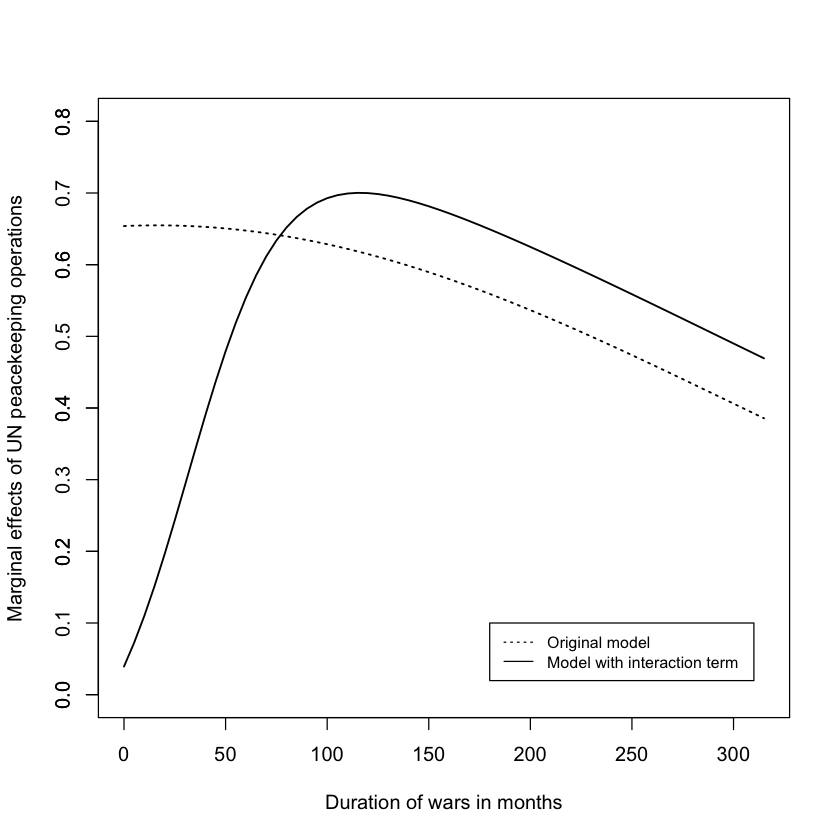

In [8]:
#----------------------------------------------------------------------------
# Plotting ATE of both models. This replicates Figure 8.
#----------------------------------------------------------------------------

plot(wardur, ATE_original, xlim = c(0,315), ylim = c(0,0.8),
     type='l', lty = 3, lwd = 1.5,
     xlab = "Duration of wars in months",
     ylab = "Marginal effects of UN peacekeeping operations")
lines(wardur, ATE_modified, lwd = 1.5)
axis(2, at=seq(0.0,0.8,0.1))
legend(180, 0.1, legend=c("Original model", "Model with interaction term"),
        lty=c(3,1), cex=0.8)

## Question 3 - What's treatment?

Define treatment as below:

    Tr <- rep(0, length(foo$untype))
    Tr[which(foo$untype != "None")] <- 1

What does this mean? What is "treatment"?
> The first line creates an array of 0 in length of the treatment
column (untype), the second line sets this to 1 (treatment condition) whenever any kind of UN intervention (not None) is specified.

## Question 4 - NGO

1. Let's pretend you work for an NGO and your manager asks you to estimate the impact of the treatment identified above on lenient peacebuilding success 2 years and 5 years after the war. You will have to search for these two outcomes variables in the codebook.
> *pbs2l* and *pbs5l*

    >**From the codebook:** *"We coded PBS2L = 1 (success), if WAREND2 = 1 & NOVIOL2 = 1, and if state
sovereignty is not divided (i.e. state authority can be exercised in the entire territory of the state). We coded PBS2L = 0 otherwise."*

1. In no more than 1 sentence, articulate the causal question as best you can (being as clear as you can about treatment and control)
> What is the effect of UN peacebuilding efforts 2 and 5 years after the war (treatment) as compared to non-intervention (control)?
2. In no more than 1 sentence, explain how/why SUTVA might be violated here. In no more than 1 additional sentence, explain how you could in theory use the "restrict" argument (in Match()/GenMatch()) to help address this potential problem.
> Because we are comparing data over longer time periods, countries could appear both in the control and treatment group at different time periods and hence be matched with themselves, violating SUTVA.

    >The *restrict* argument specifies a matrix with 3 columns: the first two contain two observation numbers, the last specifies their matching distance (>0 = matching distance, 0 = always match, <0 = never match).
3. Use simple logistic regression, propensity score matching, and genetic matching to try to answer these questions.

In [9]:
library(MASS)
library(Matching)
library(rgenoud)

Warning message:
“package ‘MASS’ was built under R version 3.4.4”Warning message:
“package ‘Matching’ was built under R version 3.4.4”## 
##  Matching (Version 4.9-3, Build Date: 2018-05-03)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##

Warning message:
“package ‘rgenoud’ was built under R version 3.4.4”##  rgenoud (Version 5.8-2.0, Build Date: 2018-04-03)
##  See http://sekhon.berkeley.edu/rgenoud for additional documentation.
##  Please cite software as:
##   Walter Mebane, Jr. and Jasjeet S. Sekhon. 2011.
##   ``Genetic Optimization Using Derivatives: The rgenoud package for R.''
##   Journal of Statistical Software, 42(11): 1-26. 
##



In [10]:
#----------------------------------------------------------------------------
# Defining treatment as described in Question 3.
#----------------------------------------------------------------------------
peace_treat <- rep(0, length(peace_data$untype))
peace_treat[which(peace_data$untype != "None")] <- 1

peace_data['untype'] <- peace_treat

In [11]:
match_bal <- function(matchout = NULL){
    #------------------------------------------------------------------------
    # Generates the Match Balanced from a Match() output object, prints the
    # summary of said object and returns the MatchBalance object.
    #------------------------------------------------------------------------
    mb <- MatchBalance(peace_data$untype  ~ peace_data$wartype + peace_data$logcost +
                       peace_data$wardur  + peace_data$factnum + peace_data$factnum2 +
                       peace_data$trnsfcap+ peace_data$develop + peace_data$exp +
                       peace_data$decade  + peace_data$treaty,
                       match.out=matchout, nboots=100)
    if(!is.null(matchout)){summary(matchout)}

    return(mb)
}

In [12]:
#----------------------------------------------------------------------------
# Defining my X, two different Ys (one for 2 years after the intervention
# and one for 5 years after) and Treatment values.
#----------------------------------------------------------------------------
X <- cbind(peace_data$wartype, peace_data$logcost,  peace_data$wardur,
           peace_data$factnum, peace_data$factnum2, peace_data$trnsfcap,
           peace_data$develop, peace_data$exp,      peace_data$decade,
           peace_data$treaty)

Y_2y <- rep(0, length(peace_data$pbs2l))
Y_2y[which(peace_data$pbs2l == "Success")] <- 1

Y_5y <- rep(0, length(peace_data$pbs5l))
Y_5y[which(peace_data$pbs5l == "Success")] <- 1

Tr <- peace_data$untype

### Logistic Regression

|  | eff (bias adj) | eff (no bias adj) | p-val |
| --- | --- | --- | --- | 
|2 years | NA | NA(0.71) | 2.22e-16 | 
|5 years | NA | NA(0.82) | 2.22e-16 | 

In [13]:
#----------------------------------------------------------------------------
# Generating simple Logistic Regression models. Impact of the treatment will
# be the coefficient of treatment for each model. 
#----------------------------------------------------------------------------
lm_2y <- glm(pbs2l ~  wartype  + logcost  + wardur  + factnum +
                      factnum2 + trnsfcap + develop + exp     + 
                      decade   + treaty   + untype, data=peace_data, family=binomial) 

lm_5y <- glm(pbs5l ~  wartype  + logcost  + wardur  + factnum +
                      factnum2 + trnsfcap + develop + exp     + 
                      decade   + treaty   + untype, data=peace_data, family=binomial)

summary (lm_2y)
summary (lm_5y)
match_bal()


Call:
glm(formula = pbs2l ~ wartype + logcost + wardur + factnum + 
    factnum2 + trnsfcap + develop + exp + decade + treaty + untype, 
    family = binomial, data = peace_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3411  -0.7723  -0.2912   0.7355   2.1257  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  7.3711369  1.8790310   3.923 8.75e-05 ***
wartype     -1.5672612  0.5151133  -3.043  0.00235 ** 
logcost     -0.3127275  0.1182391  -2.645  0.00817 ** 
wardur       0.0032791  0.0031954   1.026  0.30480    
factnum     -0.9587863  0.6322361  -1.517  0.12939    
factnum2     0.0501228  0.0638744   0.785  0.43262    
trnsfcap     0.0042836  0.0022244   1.926  0.05415 .  
develop      0.0001873  0.0003826   0.489  0.62455    
exp         -4.8553044  2.9449234  -1.649  0.09921 .  
decade      -0.3374430  0.1780533  -1.895  0.05807 .  
treaty       1.5459400  0.6701994   2.307  0.02107 *  
untype       0.7130543  0.59870


Call:
glm(formula = pbs5l ~ wartype + logcost + wardur + factnum + 
    factnum2 + trnsfcap + develop + exp + decade + treaty + untype, 
    family = binomial, data = peace_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4358  -0.7751  -0.2251   0.8360   2.0451  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  7.0355574  1.8855853   3.731 0.000191 ***
wartype     -1.7061721  0.5265592  -3.240 0.001194 ** 
logcost     -0.2483537  0.1183115  -2.099 0.035804 *  
wardur       0.0036864  0.0034067   1.082 0.279208    
factnum     -1.1098129  0.6436706  -1.724 0.084673 .  
factnum2     0.0603537  0.0653392   0.924 0.355644    
trnsfcap     0.0043292  0.0022731   1.905 0.056838 .  
develop      0.0002431  0.0004117   0.590 0.554946    
exp         -4.9364476  3.0992960  -1.593 0.111213    
decade      -0.3071584  0.1792681  -1.713 0.086638 .  
treaty       1.3278703  0.6951965   1.910 0.056125 .  
untype       0.8233143  0.61728


***** (V1) peace_data$wartype *****
before matching:
mean treatment........ 0.63889 
mean control.......... 0.63953 
std mean diff......... -0.13261 

mean raw eQQ diff..... 0 
med  raw eQQ diff..... 0 
max  raw eQQ diff..... 0 

mean eCDF diff........ 0.000323 
med  eCDF diff........ 0.000323 
max  eCDF diff........ 0.00064599 

var ratio (Tr/Co)..... 1.0174 
T-test p-value........ 0.99468 


***** (V2) peace_data$logcost *****
before matching:
mean treatment........ 12.904 
mean control.......... 11.485 
std mean diff......... 79.811 

mean raw eQQ diff..... 1.4788 
med  raw eQQ diff..... 1.1386 
max  raw eQQ diff..... 3.3142 

mean eCDF diff........ 0.16371 
med  eCDF diff........ 0.16085 
max  eCDF diff........ 0.30039 

var ratio (Tr/Co)..... 0.49056 
T-test p-value........ 0.00067727 
KS Bootstrap p-value.. < 2.22e-16 
KS Naive p-value...... 0.020516 
KS Statistic.......... 0.30039 


***** (V3) peace_data$wardur *****
before matching:
mean treatment........ 78.083 
mean control

$BeforeMatching
$BeforeMatching[[1]]
$sdiff
[1] -0.1326107

$sdiff.pooled
[1] -0.1331815

$mean.Tr
[1] 0.6388889

$mean.Co
[1] 0.6395349

$var.Tr
[1] 0.2373016

$var.Co
[1] 0.2332421

$p.value
[1] 0.9946768

$var.ratio
[1] 1.017404

$tt
$tt$statistic
[1] -0.006697276

$tt$parameter
[1] Inf

$tt$p.value
[1] 0.9946768

$tt$estimate
[1] -0.0006459948


$qqsummary
$qqsummary$meandiff
[1] 0.0003229974

$qqsummary$mediandiff
[1] 0.0003229974

$qqsummary$maxdiff
[1] 0.0006459948


$qqsummary.raw
$qqsummary.raw$meandiff
[1] 0

$qqsummary.raw$mediandiff
[1] 0

$qqsummary.raw$maxdiff
[1] 0


attr(,"class")
[1] "balanceUV"

$BeforeMatching[[2]]
$sdiff
[1] 79.81118

$sdiff.pooled
[1] 64.75136

$mean.Tr
[1] 12.90356

$mean.Co
[1] 11.48504

$var.Tr
[1] 3.158952

$var.Co
[1] 6.439534

$p.value
[1] 0.0006772686

$var.ratio
[1] 0.490556

$ks
$ks$ks
$ks$ks$p.value
[1] 0.02051634

$ks$ks$statistic
[1] 0.3003876


$ks$ks.boot.pvalue
[1] 0


$tt
$tt$statistic
[1] 3.51754

$tt$parameter
[1] Inf

$tt$p.value

### Propensity Score Matching

|  | eff (bias adj) | eff (no bias adj) | p-val |
| --- | --- | --- | --- | 
|2 years | 0.19 | 0.05 | 0.10 | 
|5 years | NA(0.17) | NA(0.03) | 0.09 | 

In [14]:
#----------------------------------------------------------------------------
# Performing Logistic Regression for the propensity scores. Note that here 
# we predict the treatment, not the outcome, as we are calculating proba-
# bility of being assigned treatment.
#----------------------------------------------------------------------------
lm_2y_prop <- glm(untype ~ wartype  + logcost  + wardur  + factnum +
                      factnum2 + trnsfcap + develop + exp     + 
                      decade   + treaty, data=peace_data, family=binomial) 

lm_5y_prop <- glm(untype ~ wartype  + logcost  + wardur  + factnum +
                      factnum2 + trnsfcap + develop + exp     + 
                      decade   + treaty, data=peace_data, family=binomial)

prop_scores_2y <- lm_2y_prop$fitted.values
prop_scores_5y <- lm_5y_prop$fitted.values

#----------------------------------------------------------------------------
# Performing Matching on the propensity scores. match_bal() prints estimates
# with bias adjustment (as BiasAdjust = TRUE).
#----------------------------------------------------------------------------
matchout_2y_prop = Match(Tr = Tr, X = prop_scores_2y, Y = Y_2y, ties = TRUE,
                         replace = TRUE, M = 1, estimand="ATT", caliper = 1,      
                         Z = X, BiasAdjust = TRUE)
matchout_5y_prop = Match(Tr = Tr, X = prop_scores_5y, Y = Y_5y, ties = TRUE,
                         replace = TRUE, M = 1, estimand="ATT", caliper = 1,
                         Z = X, BiasAdjust = TRUE)

mb_2y_prop <- match_bal(matchout_2y_prop)
mb_5y_prop <- match_bal(matchout_5y_prop) 

#----------------------------------------------------------------------------
# Estimates without bias adjustment.
#----------------------------------------------------------------------------
matchout_2y_prop$est.noadj
matchout_5y_prop$est.noadj


***** (V1) peace_data$wartype *****
                       Before Matching 	 	 After Matching
mean treatment........    0.63889 	 	    0.63889 
mean control..........    0.63953 	 	    0.70833 
std mean diff.........   -0.13261 	 	    -14.256 

mean raw eQQ diff.....          0 	 	   0.054054 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          0 	 	          1 

mean eCDF diff........   0.000323 	 	   0.027027 
med  eCDF diff........   0.000323 	 	   0.027027 
max  eCDF diff........ 0.00064599 	 	   0.054054 

var ratio (Tr/Co).....     1.0174 	 	     1.1167 
T-test p-value........    0.99468 	 	    0.52725 


***** (V2) peace_data$logcost *****
                       Before Matching 	 	 After Matching
mean treatment........     12.904 	 	     12.904 
mean control..........     11.485 	 	     12.969 
std mean diff.........     79.811 	 	    -3.6809 

mean raw eQQ diff.....     1.4788 	 	    0.31942 
med  raw eQQ diff.....     1.1386 	 	    0.20709 
max  


***** (V1) peace_data$wartype *****
                       Before Matching 	 	 After Matching
mean treatment........    0.63889 	 	    0.63889 
mean control..........    0.63953 	 	    0.70833 
std mean diff.........   -0.13261 	 	    -14.256 

mean raw eQQ diff.....          0 	 	   0.054054 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          0 	 	          1 

mean eCDF diff........   0.000323 	 	   0.027027 
med  eCDF diff........   0.000323 	 	   0.027027 
max  eCDF diff........ 0.00064599 	 	   0.054054 

var ratio (Tr/Co).....     1.0174 	 	     1.1167 
T-test p-value........    0.99468 	 	    0.52725 


***** (V2) peace_data$logcost *****
                       Before Matching 	 	 After Matching
mean treatment........     12.904 	 	     12.904 
mean control..........     11.485 	 	     12.969 
std mean diff.........     79.811 	 	    -3.6809 

mean raw eQQ diff.....     1.4788 	 	    0.31942 
med  raw eQQ diff.....     1.1386 	 	    0.20709 
max  

[1] 0.1944444

[1] 0.1666667

### Genetic Matching

|  | eff (bias adj) | eff (no bias adj) | p-val | 
| --- | --- | --- | --- | 
|2 years | 0.17 | 0.19 | 0.17 | 
|5 years | 0.14 | 0.13 | 0.32 | 


In [15]:
#----------------------------------------------------------------------------
# Performing Genetic Matching on all X variables and using propensity scores
# to improve the matching further. Note that we do NOT try to achieve balance
# on the propensity scores.
#----------------------------------------------------------------------------
genout_2y <- GenMatch(Tr = Tr, X = cbind(X, prop_scores_2y), estimand="ATT",
                      M=1, ties = TRUE, pop.size=200, BalanceMatrix = X,
                      max.generations=25, wait.generations=5, replace = TRUE)

matchout_2y_gen <- Match(Tr = Tr, X = cbind(X, prop_scores_2y), Y = Y_2y,
                         estimand="ATT", M=1, ties = TRUE,
                         BiasAdjust = TRUE,
                         Weight.matrix = genout_2y, replace = TRUE)

mb_2y_gen <- match_bal(matchout_2y_gen)
matchout_2y_gen$est.noadj



Mon Nov 26 11:36:34 2018
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 
 0.000000e+00   <=  X7   <=    1.000000e+03 
 0.000000e+00   <=  X8   <=    1.000000e+03 
 0.000000e+00   <=  X9   <=    1.000000e+03 
 0.000000e+00   <=  X10  <=    1.000000e+03 
 0.000000e+00   <=  X11  <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOF


***** (V1) peace_data$wartype *****
                       Before Matching 	 	 After Matching
mean treatment........    0.63889 	 	    0.63889 
mean control..........    0.63953 	 	    0.66667 
std mean diff.........   -0.13261 	 	    -5.7023 

mean raw eQQ diff.....          0 	 	   0.027778 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          0 	 	          1 

mean eCDF diff........   0.000323 	 	   0.013889 
med  eCDF diff........   0.000323 	 	   0.013889 
max  eCDF diff........ 0.00064599 	 	   0.027778 

var ratio (Tr/Co).....     1.0174 	 	     1.0382 
T-test p-value........    0.99468 	 	    0.74049 


***** (V2) peace_data$logcost *****
                       Before Matching 	 	 After Matching
mean treatment........     12.904 	 	     12.904 
mean control..........     11.485 	 	     12.761 
std mean diff.........     79.811 	 	     8.0423 

mean raw eQQ diff.....     1.4788 	 	    0.40423 
med  raw eQQ diff.....     1.1386 	 	    0.33872 
max  

[1] 0.1666667

In [16]:
#----------------------------------------------------------------------------
# Genetic Matching for the 5 year outcome.
#----------------------------------------------------------------------------
genout_5y <- GenMatch(Tr = Tr, X = cbind(X, prop_scores_5y), estimand="ATT",
                      M=1, ties = TRUE, pop.size=200, BalanceMatrix = X,
                      max.generations=25, wait.generations=5, replace = TRUE)

matchout_5y_gen <- Match(Tr = Tr, X = cbind(X, prop_scores_5y), Y = Y_5y,
                         estimand="ATT", M=1, ties = TRUE,
                         BiasAdjust = TRUE,
                         Weight.matrix = genout_5y, replace = TRUE)

mb_5y_gen <- match_bal(matchout_5y_gen)
matchout_5y_gen$est.noadj



Mon Nov 26 11:36:54 2018
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 
 0.000000e+00   <=  X7   <=    1.000000e+03 
 0.000000e+00   <=  X8   <=    1.000000e+03 
 0.000000e+00   <=  X9   <=    1.000000e+03 
 0.000000e+00   <=  X10  <=    1.000000e+03 
 0.000000e+00   <=  X11  <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOF


***** (V1) peace_data$wartype *****
                       Before Matching 	 	 After Matching
mean treatment........    0.63889 	 	    0.63889 
mean control..........    0.63953 	 	    0.66667 
std mean diff.........   -0.13261 	 	    -5.7023 

mean raw eQQ diff.....          0 	 	   0.027778 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          0 	 	          1 

mean eCDF diff........   0.000323 	 	   0.013889 
med  eCDF diff........   0.000323 	 	   0.013889 
max  eCDF diff........ 0.00064599 	 	   0.027778 

var ratio (Tr/Co).....     1.0174 	 	     1.0382 
T-test p-value........    0.99468 	 	     0.5656 


***** (V2) peace_data$logcost *****
                       Before Matching 	 	 After Matching
mean treatment........     12.904 	 	     12.904 
mean control..........     11.485 	 	     12.713 
std mean diff.........     79.811 	 	     10.748 

mean raw eQQ diff.....     1.4788 	 	    0.36253 
med  raw eQQ diff.....     1.1386 	 	    0.30357 
max  

[1] 0.1388889

** Final answer**

1. A table summarizing the results.

|  | eff (bias adj) | eff (no bias adj) | p-val |
| --- | --- | :--- | --- | --- |
| Logistic Regression | ||||
|2 years | NA | NA(0.71) | 2.22e-16 | 
|5 years | NA | NA(0.82) | 2.22e-16 | 
| Propensity Score Matching | |||
|2 years | 0.19 | 0.05 | 0.10 | 
|5 years | NA(0.17) | NA(0.03) | 0.09 |  
| Genetic Matching | |||
|2 years | 0.17 | 0.19 | 0.17 | 
|5 years | 0.14 | 0.13 | 0.32 | 

2. The functional forms of the propensity score model
> untype ~ wartype  + logcost  + wardur  + factnum + factnum2 + trnsfcap + develop + exp     + decade   + treaty, family=binomial

    > Note that we are now using untype as our treatment variable as described in Question 3 and we no longer inlcude the treatment interaction term from Question 1.
3. The variables you've genetically matched on and the MatchBalance variables used for genetic matching.
> Since our model does not include interaction terms now, GenMatch matches on the same variables as included in the propensity score model above + the propensity scores previously calculated. MatchBalance also has the same functional form.


## Question 5 - Decision Memo
Let's pretend you have to write a decision memo for policy purposes summarizing all your work (above). Your memo would begin with a a brief executive summary summarizing what you've done and your policy advice, and it would end with a brief concluding passage restating your analysis and what you want your reader to take away from it (including the policy advice). The executive summary and the conclusion would be very similar--to the extent the two are at all different, there is scope for the conclusion to be a bit more technical and/or nuanced, and the conclusion could also include some recommendations for relevant future analysis.

1. DO NOT WRITE the ENTIRE decision memo. Instead, just provide a 3-5 sentence executive summary AND a separate 3-5 sentence conclusion.

### Decision Memo
**To:** Professor Alexis Diamond

#### Executive summary
In our analysis of UN Peacekeeping efforts we have demonstrated that Doyle and Sambanis (2000)'s results are model dependent as described in King and Zeng (2007). We have then attempted to compare effects of UN peace keeping between the simple Regression model and models including Matching procedures to avoid model dependence. Our Genetic Matching Procedure has found small, positive effects of UN peacekeeping after 2 years and less, but still positive effects, after 5 years. These impacts are not as large as described by Doyle and Sambanis (2000), but do suggest that UN peacekeeping efforts are warranted. 

#### Conclusion
In our analysis of UN Peacekeeping efforts we have demonstrated that Doyle and Sambanis (2000)'s results are model dependent as described in King and Zeng (2007). Our Matching procedures demonstrated that there is a small, positive effects of UN peacekeeping after 2 years (0.17 with bias adjustment) and less, but still positive effects, after 5 years (0.14 with bias adjustment). Our results suggest that UN peacekeeping efforts are warranted, showing positive effects for both short and longer-term post-war periods. For the future we suggest continued monitoring of UN peacekeeing efforts and a more indepth analysis could attempt to sub-divide the existing data into categories based on certain characteristics to see if countries with those characteristics might be more or less susceptible to UN peacekeeping efforts.